In [ ]:
#Liberia para realizar cálculos lógicos y matematicos sobre cuadros y matrices
import numpy as np
#Libreria como extensión de Numpy para la manipulación y análisis de datos
import pandas as pd
#Libreria para la creación de gráficos en dos dimensiones.
import matplotlib.pyplot as plt
#Libreria para la creación de modelos de aprendizaje automático.
import tensorflow as tf
#Libreria para el manejo de archivos y directorios
import os
#Libreria para generar números aleatorios
import random as rn
#Modulo que permite crear una barra de progreso basado en texto
from tqdm import tqdm
#Libreria para el manejo de imagenes
import cv2
#Libreria que proporciona acceso a versiones eficaces de muchos algoritmos comunes.
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Imagenes=[]
Etiquetas=[]
IMG_TAM = 158
DIR_BASE = '/content/drive/MyDrive/TT/Imagenes clasificadas'
DIR_ENFERMO_SR = DIR_BASE+'/Enfermo/Stem end Rot'
DIR_ENFERMO_BR = DIR_BASE+'/Enfermo/Body rot'
#DIR_ENFERMO = DIR_BASE+'/Enfermo
DIR_SANO = DIR_BASE+'/Sano'

In [ ]:
def obtener_extension_archivos(DIR):
  ext=[]
  for archivo in os.listdir(DIR):
    nom_archivo, ext_archivo = os.path.splitext(archivo)
    ext.append(ext_archivo)
  extensiones=set(ext)
  print(extensiones)




In [ ]:
def imagen_valida(archivo,extensiones=[".jpg",".png",".JPG",".PNG",".jfif",".jpeg"]):
  nom_archivo, ext_archivo = os.path.splitext(archivo)
  es_archivo = os.path.isfile(archivo)
  es_imagen = ext_archivo.lower() in extensiones
  return es_archivo and es_imagen


In [ ]:
obtener_extension_archivos(DIR_ENFERMO_SR)
obtener_extension_archivos(DIR_ENFERMO_BR)
obtener_extension_archivos(DIR_SANO)


{'.jpg', '.JPG', '.jpeg', '.webp', '.PNG', '.jfif', '.png'}
{'.jpg', '.JPG', '.jpeg', '.PNG', '.jfif'}
{'', '.jpg', '.JPG', '.jpeg', '.avif', '.jfif'}


In [ ]:
def construir_base_datos(etiqueta, DIR):
  for archivo in tqdm(os.listdir(DIR)):
    #Construir ruta completa
    ruta = os.path.join(DIR,archivo)
    if imagen_valida(ruta):
      #Carga la imagen en RGB
      img = tf.keras.preprocessing.image.load_img(ruta,color_mode='rgb')
      #Convierte la imagen en una matriz de números
      matriz_img = tf.keras.preprocessing.image.img_to_array(img)
      #Redimenciona la imagen y normaliza la imagen [0 a 1]
      matriz_img = tf.image.resize(matriz_img/255,[IMG_TAM,IMG_TAM])
      #Agrega la matriz (array) a la lista
      Imagenes.append(matriz_img.numpy())
      #Añade la etiqueta a asociada a la imagen
      Etiquetas.append(etiqueta)



In [ ]:
clases=['Sano','Enfermo_BODYROT','Enfermo_STEMENDROT']
construir_base_datos(0,DIR_SANO)
print('\n',len(Etiquetas))
construir_base_datos(1,DIR_ENFERMO_BR)
print('\n',len(Etiquetas))
construir_base_datos(2,DIR_ENFERMO_SR)
print('\n',len(Etiquetas))

100%|██████████| 126/126 [00:26<00:00,  4.68it/s]



 74


100%|██████████| 34/34 [00:09<00:00,  3.46it/s]



 97


100%|██████████| 68/68 [00:15<00:00,  4.35it/s]


 158


In [ ]:
type(Imagenes[2])

numpy.ndarray

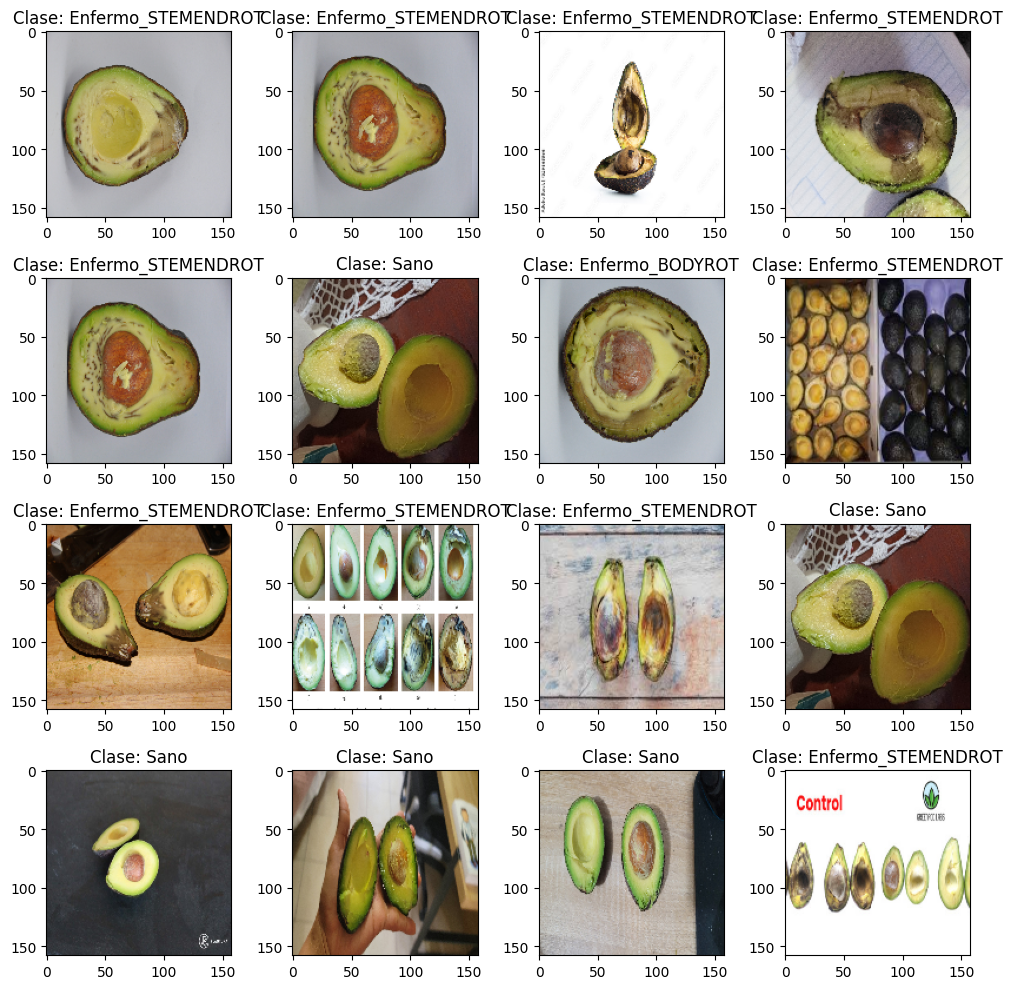

In [ ]:
#crea una cuadrícula de subgráficos
fig,ax=plt.subplots(4,4)
#Ajusta el tamaño de la figura
fig.set_size_inches(10,10)
for i in range(4):
    for j in range (4):
        #Selecciona un número aleatorio
        l=rn.randint(0,len(Etiquetas))
        ax[i,j].imshow(Imagenes[l])
        ax[i,j].set_title('Clase: '+clases[Etiquetas[l]])
plt.tight_layout()